In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:04<00:00, 43.0MB/s]
100% 163M/163M [00:05<00:00, 34.1MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

 data			'img 1.jpeg'   kaggle.json
 face-mask-dataset.zip	'img 2.jpeg'   sample_data


### Importing the **Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3304.jpg', 'with_mask_2585.jpg', 'with_mask_2634.jpg', 'with_mask_3214.jpg', 'with_mask_1398.jpg']
['with_mask_2724.jpg', 'with_mask_2031.jpg', 'with_mask_615.jpg', 'with_mask_159.jpg', 'with_mask_109.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2545.jpg', 'without_mask_3752.jpg', 'without_mask_3160.jpg', 'without_mask_1124.jpg', 'without_mask_299.jpg']
['without_mask_688.jpg', 'without_mask_2258.jpg', 'without_mask_75.jpg', 'without_mask_480.jpg', 'without_mask_304.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

1.   List item
2.   List item

with mask --> 1

without mask --> 0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

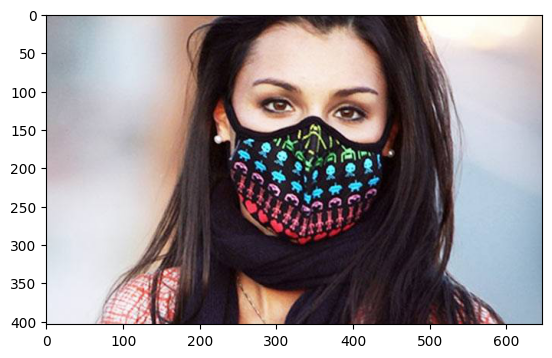

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_3419.jpg')
imgplot = plt.imshow(img)
plt.show()

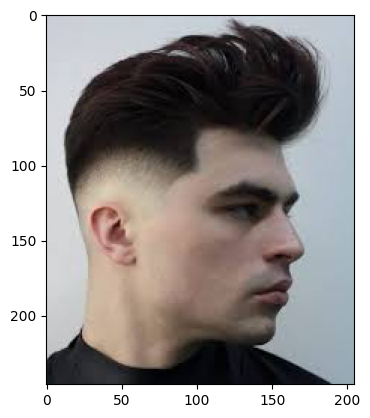

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2585.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

In [19]:
data[0]

array([[[186, 186, 186],
        [185, 185, 185],
        [184, 184, 184],
        ...,
        [140, 140, 142],
        [137, 137, 137],
        [134, 134, 134]],

       [[188, 188, 187],
        [187, 187, 187],
        [186, 186, 186],
        ...,
        [142, 141, 141],
        [137, 138, 138],
        [134, 134, 136]],

       [[190, 190, 189],
        [188, 188, 188],
        [187, 187, 187],
        ...,
        [143, 143, 142],
        [138, 138, 138],
        [134, 134, 136]],

       ...,

       [[  7,   7,   6],
        [  9,   9,   8],
        [ 16,  16,  16],
        ...,
        [ 36,  37,  42],
        [ 40,  40,  45],
        [ 42,  41,  47]],

       [[  7,   7,   6],
        [  7,   7,   5],
        [ 10,  10,   8],
        ...,
        [ 37,  39,  44],
        [ 41,  41,  46],
        [ 42,  41,  49]],

       [[  8,   8,   6],
        [  6,   6,   4],
        [  7,   6,   4],
        ...,
        [ 40,  39,  45],
        [ 41,  41,  46],
        [ 41,  41,  47]]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [30]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[249, 249, 246],
        [250, 250, 248],
        [253, 254, 251],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255]],

       ...,

       [[ 83,  86, 157],
        [ 82,  85, 156],
        [ 78,  81, 152],
        ...,
        [247, 249, 241],
        [255, 251, 251],
        [253, 252, 248]],

       [[ 91,  94, 165],
        [ 83,  86, 157],
        [ 85,  88, 159],
        ...,
        [246, 249, 241],
        [255, 252, 251],
        [252, 253, 248]],

       [[ 89,  92, 163],
        [ 85,  88, 159],
        [ 82,  85, 156],
        ...,
        [245, 251, 241],
        [254, 253, 251],
        [251, 253, 248]]

In [31]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.97647059, 0.97647059, 0.96470588],
        [0.98039216, 0.98039216, 0.97254902],
        [0.99215686, 0.99607843, 0.98431373],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.3254902 , 0.3372549 , 0.61568627],
        [0.32156863, 0.33333333, 0.61176471],
        [0.30588235, 0

Building a Convolutional Neural Networks (CNN)

1.   List item
2.   List item



In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 23ms/step - loss: 0.5035 - acc: 0.7787 - val_loss: 0.2619 - val_acc: 0.8909
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2965 - acc: 0.8827 - val_loss: 0.2675 - val_acc: 0.8760
Epoch 3/5
170/170 [==============================] - 5s 31ms/step - loss: 0.2368 - acc: 0.9053 - val_loss: 0.2042 - val_acc: 0.9041
Epoch 4/5
170/170 [==============================] - 4s 23ms/step - loss: 0.2030 - acc: 0.9182 - val_loss: 0.2069 - val_acc: 0.9223
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1740 - acc: 0.9303 - val_loss: 0.2125 - val_acc: 0.9223


Model Evaluation

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [37]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.1879 - acc: 0.9332
Test Accuracy = 0.9331568479537964


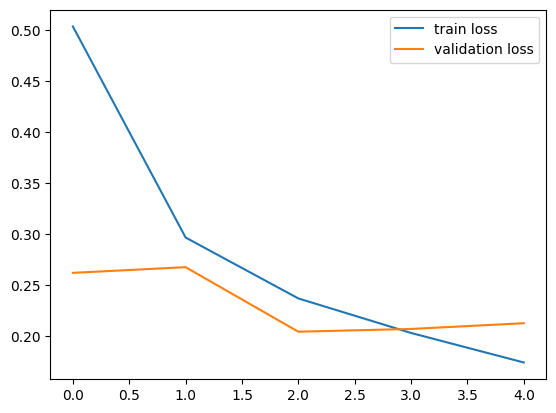

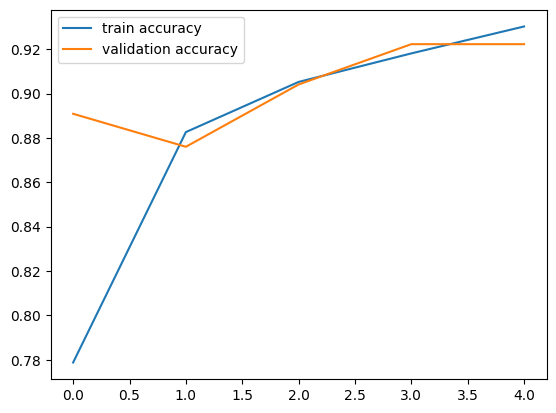

In [38]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/img 1.jpeg


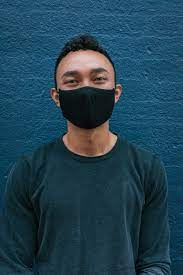

1/1 [==============================] - 0s 182ms/step
[[0.43938276 0.5513041 ]]
1
The person in the image is wearing a mask


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/img 3.jpeg


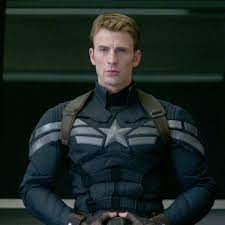

1/1 [==============================] - 0s 21ms/step
[[0.6213425  0.26708153]]
0
The person in the image is not wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')